In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns 

In [35]:
df = pd.read_csv("../data/column_3C_weka.csv")
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,area
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [36]:
lg = LinearRegression()
label_encoder = preprocessing.LabelEncoder()
df['area'] = label_encoder.fit_transform(df['area'])

In [37]:
df = df.round(2)

In [38]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,area
0,63.03,22.55,39.61,40.48,98.67,-0.25,0
1,39.06,10.06,25.02,29.00,114.41,4.56,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,0
3,69.30,24.65,44.31,44.64,101.87,11.21,0
4,49.71,9.65,28.32,40.06,108.17,7.92,0
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,1
306,53.94,20.72,29.22,33.22,114.37,-0.42,1
307,61.45,22.69,46.17,38.75,125.67,-2.71,1
308,45.25,8.69,41.58,36.56,118.55,0.21,1


In [67]:
x = df.drop(["area"], axis=1)
y = df["area"]
x_encoded = pd.get_dummies(x, prefix_sep="_")
y_encoded = df["area"]
x_encoded["area"] = y_encoded


y_encoded

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: area, Length: 310, dtype: int64

<Axes: >

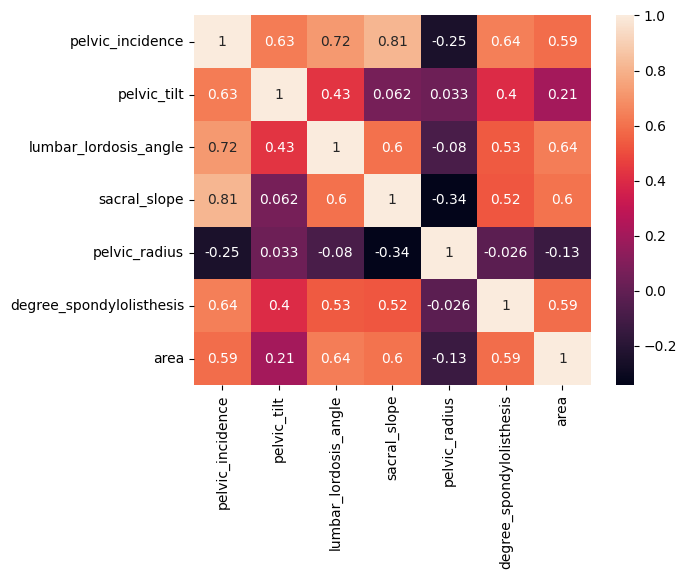

In [68]:
sns.heatmap(x_encoded.corr(), annot=True)

In [42]:
x = df.iloc[:,[0,6]].values
y = df.area.values.reshape(-1,1)

In [95]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

print("b0: ", multiple_linear_regression.intercept_)
print("b1,b2,b3,b4,b5,b6: ",multiple_linear_regression.coef_)


b0:  0.02109923490985266
b1,b2,b3,b4,b5,b6:  [-3.35756594e+00  3.35008266e+00  1.59965306e-02  3.36982327e+00
 -1.05682548e-03  6.34822219e-03]


In [97]:
multiple_linear_regression.predict([[63.03,22.55,39.61,40.48,98.67,-0.25],[63.03,22.55,39.61,40.48,98.67,-0.25]])

array([0.8762865, 0.8762865])